In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
import random
import numpy as np
import glob
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
from tqdm.notebook import tqdm
import zipfile
import pickle
patch_size = 256

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/ai4good/8bit.zip', 'r') as file:
  file.extractall('train')

In [ ]:
#sample folder Khartoum (is in Sudan)
data_path = '/content/train/8bit'
cities = ['/Khartoum/', '/Paris/', '/Vegas/', '/Shanghai/']
test = '/content/drive/MyDrive/ai4good/updated/corrected_2460_9855.tif'


In [ ]:
#pytorch actually has a function for this
#called unfold 
#may be interesting to try and do this dynamically
#unnecessary, but prettier and more robust to dataset changes
def make_patches(path, channels):
  flag = 1 if channels == 3 else 0
  image = cv2.imread(path, flag) 
  SIZE_X = (image.shape[1]//patch_size)*patch_size 
  SIZE_Y = (image.shape[0]//patch_size)*patch_size
  image = image[:SIZE_Y, :SIZE_X]       

  #Extract patches from each image
  if channels == 3:
    patches_img = patchify(image, (patch_size, patch_size, channels), step=patch_size) 
    patches_img = np.reshape(patches_img, (-1, patch_size, patch_size, channels))
  else:
    patches_img = patchify(image, (patch_size, patch_size), step=patch_size)  
    patches_img = np.reshape(patches_img, (-1, patch_size, patch_size, 1))
  return patches_img

In [ ]:
image = cv2.imread(test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

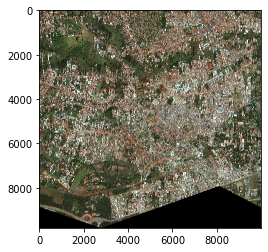

In [ ]:
plt.imshow(image)

In [ ]:
all_image_patches = []
all_mask_patches = []

In [ ]:
test_patches = make_patches(test, 3)

In [ ]:
with open('/content/drive/MyDrive/ai4good/test_patches24609855', 'wb') as f:
  pickle.dump(test_patches, f)

In [ ]:
for city in cities:
  image_path = data_path + city + 'images'
  mask_path = data_path + city + 'mask'
  for filename in tqdm(sorted(glob.glob(image_path + '/*.tif'))): 
    patches = make_patches(filename, 3)
    all_image_patches.extend(patches)
  for filename in tqdm(sorted(glob.glob(mask_path + '/*.png'))): 
    patches = make_patches(filename, 1)
    all_mask_patches.extend(patches)


  0%|          | 0/283 [00:00<?, ?it/s]

  0%|          | 0/283 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/1198 [00:00<?, ?it/s]

  0%|          | 0/1198 [00:00<?, ?it/s]

In [ ]:
len(all_image_patches)

69500

In [ ]:
len(all_mask_patches)

69500

In [ ]:
all_mask_patches[0].shape

(256, 256, 1)

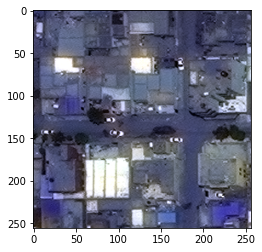

In [ ]:
plt.imshow(all_image_patches[59])

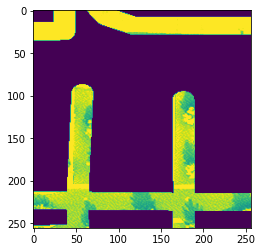

In [ ]:
plt.imshow(all_mask_patches[15159][:, :, 0])

In [ ]:
dataset = list(zip(all_image_patches, all_mask_patches))

In [ ]:
dataset[0][1].shape

(256, 256, 1)

In [ ]:
random.shuffle(dataset)

In [ ]:
split_index = int(len(all_image_patches)*0.25)
train1 = dataset[:split_index]
train2 = dataset[split_index:split_index*2]
train3 = dataset[split_index*2:split_index*3]

val = dataset[split_index*3:]

#Save everything, patches as list together and as individual image files our models don't need tifs atm anyway

In [ ]:
with open('/content/drive/MyDrive/ai4good/train.pkl', 'wb') as f:
  pickle.dump(train1, f)

In [ ]:
with open('/content/drive/MyDrive/ai4good/train2.pkl', 'wb') as f:
  pickle.dump(train2, f)

In [ ]:
with open('/content/drive/MyDrive/ai4good/train3.pkl', 'wb') as f:
  pickle.dump(train3, f)

In [ ]:
with open('/content/drive/MyDrive/ai4good/val.pkl', 'wb') as f:
  pickle.dump(val, f)

In [ ]:
#with open('ai4good/mask_patches.pkl', 'wb') as f:
#  pickle.dump(all_mask_patches, f)

In [ ]:
all_image_patches[0].shape

(256, 256, 3)

In [ ]:
for i, image in enumerate(all_image_patches):
  cv2.imwrite(f"aai4good/Khartoum/image_patches/{i}.png", image)

In [ ]:
for i, mask in enumerate(all_mask_patches):
  cv2.imwrite(f"ai4good/Khartoum/mask_patches/{i}.png", mask)